## <center>CMSC6950 | Fall 2023<center>
## <center>Project Proposal: St. John's Climate Data Analysis<center>
## <center>Mohammadali Mirmojarabian, 202292543<center>
___

We want to analyze St. John's climate data. To access data source and for a comprehensive information about the data please refer to https://stjohns.weatherstats.ca/download.html.
<!-- For Frequently Asked Questions visit [here](https://www.weatherstats.ca/faq/#copying). -->

We downloaded 200 daily climatic data points. I might want to increase data points to 400 if needed. In this specific project, we don't need to examine all measurements. We choose temperature and wind speed features; we might use other features from original dataset if needed, which then would be described in that case.
- `max_temperature` and `min_temperature`: Maximum and Minimum Temperature (**°C**)

- `avg_temperature` is the average between the daily maximum and minimum temperatures, while `avg_hourly_temperature` is the average of all the hourly temperatures within the day.

- `max_wind_speed` and `min_wind_speed`: Maximum and Minimum Wind Speed (**km/h**)

- `precipitation`: Precipitation (**mm**): The amount of rain/snow/etc. received. Snow is melted to create a water equivalent. 1cm snow is approx. 1mm of precipitation, but the exact amount depends on the snow density (e.g., corn snow vs light fluffy snow). 

In [113]:
import pandas as pd
import numpy as np

In [120]:
cols = ['date','max_temperature','min_temperature','avg_hourly_temperature','avg_temperature','max_wind_speed',
'avg_hourly_wind_speed','min_wind_speed','precipitation']

df = pd.read_csv('./data.csv', parse_dates=['date'], usecols=cols)
df

,date,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_wind_speed,avg_hourly_wind_speed,min_wind_speed,precipitation
0,2023-10-16,11.8,9.98,9.80,7.8,43,27.50,7,51.2
1,2023-10-15,16.0,11.51,12.30,8.6,25,16.12,9,0.4
2,2023-10-14,13.2,11.64,11.80,10.4,36,25.50,16,6.2
3,2023-10-13,12.3,10.90,11.20,10.1,26,17.50,6,1.0
4,2023-10-12,13.8,11.40,11.35,8.9,19,8.54,1,0.6
...,...,...,...,...,...,...,...,...,...
595,2022-02-28,-1.1,-4.35,-5.55,-10.0,36,19.12,1,9.2
596,2022-02-27,-2.4,-6.70,-7.55,-12.7,38,23.33,11,0.0
597,2022-02-26,-7.8,-8.81,-9.60,-11.4,33,22.46,3,3.8
598,2022-02-25,-4.2,-6.80,-6.50,-8.8,48,31.54,9,0.2


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    200 non-null    datetime64[ns]
 1   max_temperature         200 non-null    float64       
 2   avg_hourly_temperature  200 non-null    float64       
 3   avg_temperature         200 non-null    float64       
 4   min_temperature         200 non-null    float64       
 5   max_wind_speed          200 non-null    int64         
 6   avg_hourly_wind_speed   200 non-null    float64       
 7   min_wind_speed          200 non-null    int64         
 8   precipitation           200 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 14.2 KB


We can consider various statistics and analyses to examine in detail. Here are some examples:

1. **Descriptive Statistics:** Describe basic statistics for each variable, such as mean (average), median (middle value), standard deviation (measure of data spread), and quartiles (dividing data into quarters).

2. **Extreme Value Analysis:** Identify and analyze extreme values in our data. For instance, we might examine the days with the highest and lowest temperatures, or those with the highest wind speeds.

3. **Trends and Seasonality:** Examine temporal trends in our time-series data. We could calculate moving averages, identify seasonality, or look for patterns in temperature changes or wind speed variations over time.

4. **Correlation Analysis:** Explore relationships between different variables. For example, we could investigate whether wind speed is correlated with temperature.

5. **Hypothesis Testing:** For example, we might want to test whether there's a statistically significant difference in temperature between different months.

6. **Visualization:** We plan to use visualization techniques to complement our statistical analysis. For example, we can create time series plots, scatter plots, or box plots to help convey the patterns and outliers in our data.

 

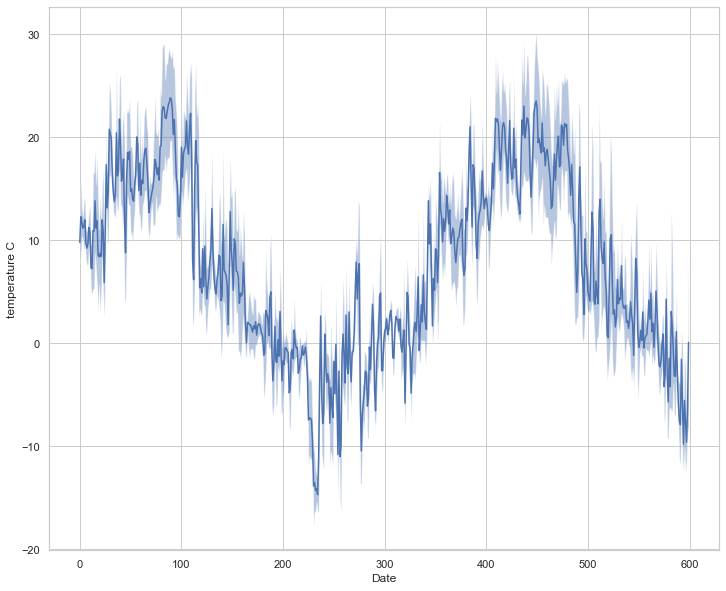

In [121]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(12, 10))
# axs=axs.flatten()

# Here we can select the fields using masks and save the dataframe in some aux variables
temp = df[['min_temperature','max_temperature', 'avg_temperature']]

temp['avg_temperature'].plot(ax=axs, xlabel='Date', ylabel='temperature C')
axs.fill_between(x=df.index, y1=temp['min_temperature'],
                    y2=temp['max_temperature'], alpha=0.4)



# fig, ax = plt.subplots(figsize=(12, 6))

# # Plot the temperature columns using the df[].plot method
# df['min_temperature'].plot(ax=ax, x= 'date', color='blue', label='Min Temperature')
# df['avg_temperature'].plot(ax=ax, x= 'date', color='grey', label='Avg Temperature')
# df['max_temperature'].plot(ax=ax, x= 'date', color='red', label='Max Temperature')

# # Customize the plot
# ax.set_xlabel('Date')
# ax.set_ylabel('Temperature (°C)')
# ax.set_title('Temperature Over Time')
# plt.legend()
# plt.grid(True)
# # Show the plot
# plt.show()



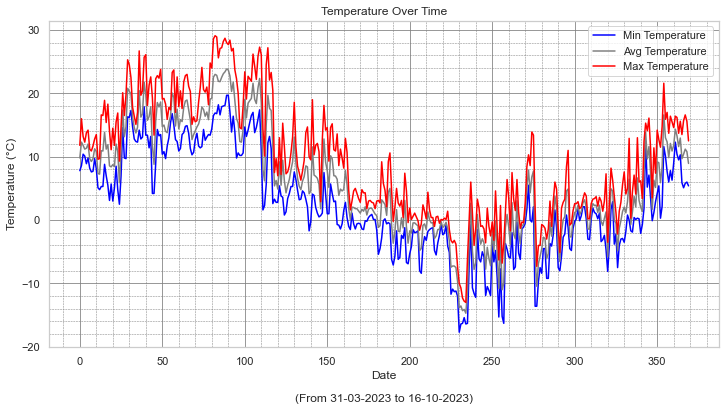

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a time series plot for temperature using Seaborn
fig, ax = plt.subplots(figsize=(12, 6))
# axs=axs.flatten()

# Plot the temperature columns with Seaborn
sns.lineplot(data=df, x=df.index, y='min_temperature', ax=ax, label='Min Temperature', color='blue')
sns.lineplot(data=df, x=df.index, y='avg_temperature', ax=ax, label='Avg Temperature', color='grey')
sns.lineplot(data=df, x=df.index, y='max_temperature', ax=ax, label='Max Temperature', color='red')

# Customize the plot
ax.set_xlabel('Date\n\n(From 31-03-2023 to 16-10-2023)')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature Over Time')
plt.legend()

# Activate minor grid lines
ax.minorticks_on()
# Set grids
plt.grid(True, which='major', linestyle='-', linewidth=0.8, color='gray')
plt.grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')
plt.show()

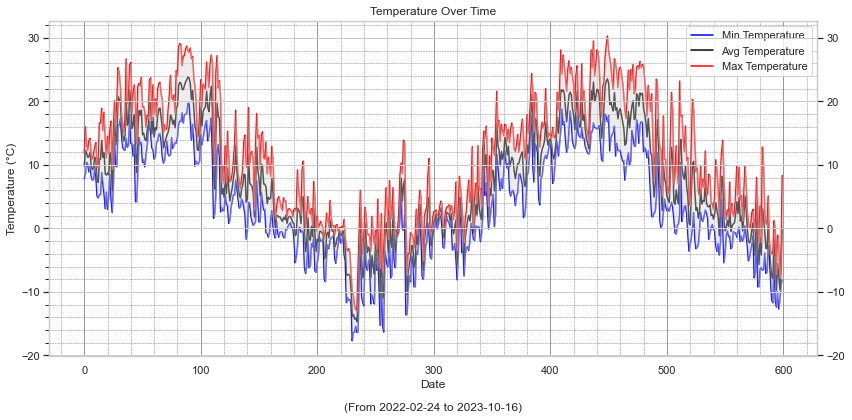

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a time series plot for temperature using Seaborn
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the temperature columns with Seaborn
sns.lineplot(data=df, x=df.index, y='min_temperature', ax=ax, label='Min Temperature', color='blue')
sns.lineplot(data=df, x=df.index, y='avg_temperature', ax=ax, label='Avg Temperature', color='black')
sns.lineplot(data=df, x=df.index, y='max_temperature', ax=ax, label='Max Temperature', color='red')

# Customize the plot
ax.set_xlabel('Date\n\n(From 2022-02-24 to 2023-10-16)')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature Over Time')

# Activate minor grid lines
ax.minorticks_on()
# Set grids
plt.grid(True, which='major', linestyle='-', linewidth=0.8, color='gray')
plt.grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')

# Create a new set of axes for the fill_between plot
ax_fill = ax.twinx()

# Plot the fill_between
temp = df[['min_temperature', 'max_temperature', 'avg_temperature']]
ax_fill.fill_between(x=df.index, y1=temp['min_temperature'], y2=temp['max_temperature'], alpha=0.4, color='lightgray')

plt.tight_layout()
plt.savefig('First_plot.png', facecolor='w', dpi=1000)
plt.show()


___
# index_col=['date']

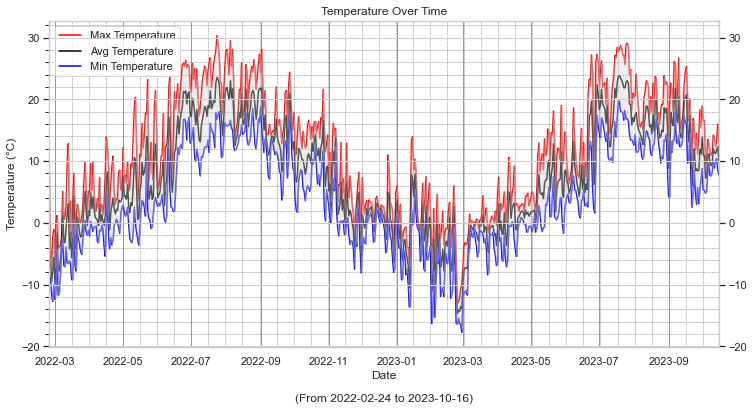

In [139]:
cols = ['date','max_temperature','min_temperature','avg_hourly_temperature','avg_temperature','max_wind_speed',
'avg_hourly_wind_speed','min_wind_speed','precipitation']

df = pd.read_csv('./data.csv', parse_dates=['date'], index_col=['date'], usecols=cols)

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import MonthLocator, DateFormatter

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a time series plot for temperature using Seaborn
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the temperature columns with Seaborn
sns.lineplot(data=df, x=df.index, y='max_temperature', ax=ax, label='Max Temperature', color='red')
sns.lineplot(data=df, x=df.index, y='avg_temperature', ax=ax, label='Avg Temperature', color='black')
sns.lineplot(data=df, x=df.index, y='min_temperature', ax=ax, label='Min Temperature', color='blue')

# Customize the plot
ax.set_xlabel('Date\n\n(From 2022-02-24 to 2023-10-16)')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Temperature Over Time')

# Activate minor grid lines
ax.minorticks_on()
# Set grids
plt.grid(True, which='major', linestyle='-', linewidth=0.8, color='gray')
plt.grid(True, which='minor', linestyle='--', linewidth=0.5, color='gray')

# Create a new set of axes for the fill_between plot
ax_fill = ax.twinx()

# Plot the fill_between
temp = df[['min_temperature', 'max_temperature', 'avg_temperature']]
ax_fill.fill_between(x=df.index, y1=temp['min_temperature'], y2=temp['max_temperature'], alpha=0.4, color='lightgray')

# Set the x-axis
# ax = plt.gca(); ax.xaxis.set_major_locator(MonthLocator())

# ax.set(xlim=[df.index[-1], df.index[0]])

# plt.tight_layout()
# plt.savefig('First_plot2.png', facecolor='w', dpi=1000)
plt.show()
